<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

### WEEK 6 - PROJECT  3
### Submitted by - Roshan Lulu

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [429]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load the data
data = pd.read_csv('./housing.csv')

In [430]:
# Creating group masks based on the above column names. 
# The following prefixes are applied to the column names to help grouping later on during EDA

# Type - Classification related
# F - Assumed as fixed characteristics
# C - Assumed as changeable characteristics
# Int - Property characteristics
# Ext - External surrounding characteristics
# Mat - Material used in the property
# Util - Utilities in property
# Cond - Condition of property feture
# Qual - Quality factor of any property feature
# Sqft - The Area of any property feature
# Room - No of rooms in the property
# Bsmt - Basement characteristics of property
# Gar - Garage characteristics of property
# Year - Any year related to property buy/sell/renovate
# Porch - Porch related characteristics of the house
# Pool - Pool related characteristics of the house
# Misc - Miscellaneous characteristics of the house
# Price - Price related details
# Con - Continuous Cat - Categorical(make dummies)

masks = ['Ext_F_Type_Cat_', 'Ext_F_Type_Cat_', 'Ext_F_Sqft_Cont_', 'Int_F_Sqft_Cont_', 'Ext_C_Cat_', 'Ext_C_Cat_', 
'Int_F_Cat_', 'Int_F_Cat_', 'Int_C_Util_Cat_', 'Int_F_Cat_', 'Ext_F_Cat_',
'Ext_F_Cat_', 'Ext_F_Cat_', 'Ext_F_Cat_', 'Int_F_Cat_', 'Int_F_Cat_',
'Int_C_Cat_', 'Int_C_Cat_', 'Ext_F_Year_Cont_', 'Ext_F_Year_Cont_', 'Int_C_Mat_Cat_',
'Int_C_Mat_Cat_', 'Int_C_Mat_Cat_', 'Int_C_Mat_Cat_', 'Int_C_Mat_Cat_', 'Int_C_Mat_Sqft_Cont_',
'Int_C_Mat_Qual_Cat_', 'Int_C_Mat_Cond_Cat_', 'Int_F_Mat_Cat_', 'Int_C_Bsmnt_Qual_Cat_', 'Int_C_Bsmnt_Cond_Cat_',
'Int_C_Bsmnt_Cat_', 'Int_F_Bsmnt_Qual_Cat_', 'Int_F_Bsmnt_Sqft_Cont_', 'Int_F_Bsmnt_Qual_Cat_',
'Int_F_Bsmnt_Sqft_Cont_', 'Int_F_Bsmnt_Sqft_Cont_', 'Int_F_Bsmnt_Sqft_Cont_', 'Int_C_Util_Cat_', 'Int_C_Qual_Util_Cat_',
'Int_C_Util_Cat_', 'Int_C_Util_Cat_', 'Int_F_Sqft_Cont_', 'Int_F_Sqft_Cont_', 'Int_C_Sqft_Cont_',
'Int_F_Sqft_Cont_', 'Int_F_Room_Cont_', 'Int_F_Room_Cont_', 'Int_F_Room_Cont_', 'Int_F_Room_Cont_',
'Int_F_Room_Cont_', 'Int_F_Room_Cont_', 'Int_C_Room_Qual_Cat_', 'Int_F_Room_Cont_',
'Int_C_Cond_Cat_', 'Int_F_Util_Cont_', 'Int_C_Util_Qual_Cat_',  'Int_F_Gar_Cat_', 'Int_F_Gar_Year_Cont_',
'Int_C_Gar_Mat_Cat_', 'Int_C_Gar_Room_Cont_', 'Int_F_Gar_Sqft_Cont_', 'Int_C_Gar_Qual_Cat_', 'Int_C_Gar_Cond_Cat_',
'Int_C_Cat_', 'Int_F_Mat_Sqft_Cat_', 'Int_F_Porch_Sqft_Cont_', 'Int_F_Porch_Sqft_Cont_', 'Int_F_Porch_Sqft_Cont_',
'Int_F_Porch_Sqft_Cont_', 'Int_F_Pool_Sqft_Cont_', 'Int_C_Pool_Qual_Cat_', 'Int_C_Mat_Cat_', 'Int_F_Misc_Cat_', 'Int_F_Misc_Price_Cont_',
'Int_F_Year_Cont_', 'Int_F_Year_Cont_', 'Ext_Type_F_Cat_', 'Ext_Type_F_Cat_', 'Ext_Type_F_Price_Cont_']



In [431]:
data = data.drop('Id', axis = 1)
# print(data.columns)

In [432]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [433]:
# My go to code to find column names i want based on the prefix as there are so many columns!!
def getmecolnames(whatIwant):
    namesIget = []
    for index, col in enumerate(data.columns):
        if (whatIwant in masks[index]):
            namesIget.append(col)
    return namesIget

def getme_mult_colnames(whatIwant1, whatIwant2):
    namesIget = []
    for index, col in enumerate(data.columns):
        if (whatIwant1 in masks[index]) and (whatIwant2 in masks[index]):
            namesIget.append(col)
    return namesIget

# Im using data here, since we may add columns later on

In [434]:
house = data
print('Original shape of DF:')
print(house.shape)

# Set minimum number of rows and columns to be displayed as we are dealing with a large dataset
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

print('DF head:')
house.head(2)

print('Check for datattypes')
print(house.dtypes)
# Drop Column Id as it is just a numbering format and not required for our analysis
# house = house.drop('Id', axis = 1)

print('Original column names of DF')
print(house.columns)

# Masks can be used dirctly without changing column name
# # Append masks to the column names
# masks = [mask + '_' + col for mask, col in zip(masks, house.columns)]
# # Rename the columns
# house.columns = masks
# # Display new column names to cross verify the change
# print('New column names of DF after prefixes were added')
# print(house.columns)

Original shape of DF:
(1460, 80)
DF head:
Check for datattypes
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF 

In [435]:
# Since we are interested only in residential properties - Drop all rows that relate to non residential
print('Original Unique values of properties:')
print(house.MSZoning.unique())
# Infer from above: Only 10 properties are not residential. Have a look at them before dropping those rows
'''print(house[house['MSZoning'] == 'C (all)'])'''
house = house[house['MSZoning'] != 'C (all)']
print('Shape of DF after dropping non-residential properties: ')
print(house.shape)
print('New Unique values of properties: ')
print(house.MSZoning.unique())

Original Unique values of properties:
['RL' 'RM' 'C (all)' 'FV' 'RH']
Shape of DF after dropping non-residential properties: 
(1450, 80)
New Unique values of properties: 
['RL' 'RM' 'FV' 'RH']


Null values in Sale Price: 
Describe the Sale price column
count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Plot the sale price:


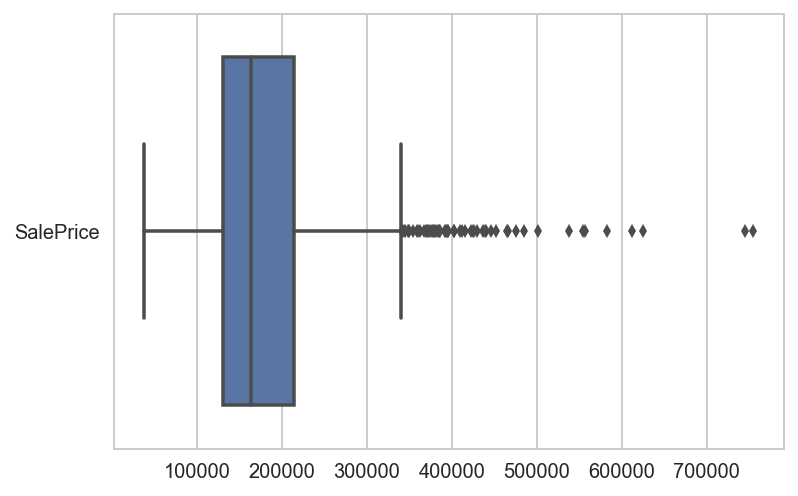

(256, 80)
Plot after dropping not normal sale condition:


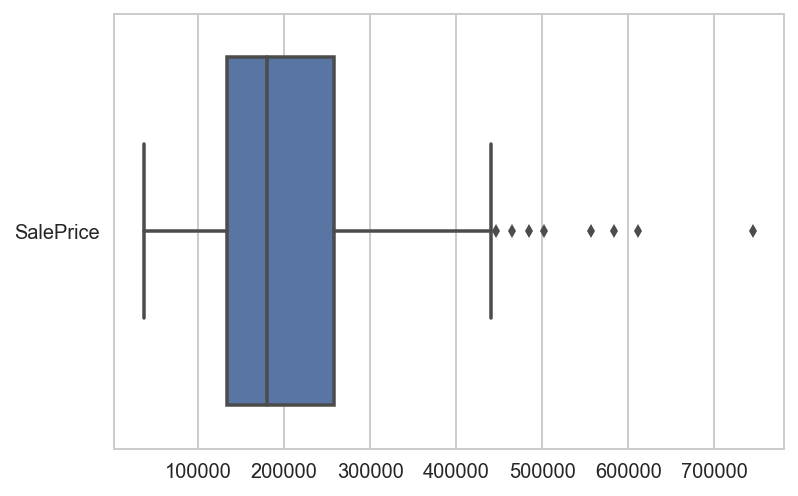

Describe the Sale price column if !Normal sale conditions are deleted


count       256.000000
mean     210430.886719
std      109227.032104
min       37900.000000
25%      134250.000000
50%      180500.000000
75%      258250.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [436]:
# Sale price is our target. It would be good to know the pattern in that parameter

# 1. Check for null values
print('Null values in Sale Price: ')
house.SalePrice.isnull().sum()
# Infer: There are no null values in Sale price

# 2. It would be good to observe the sale price range, to check for any outliers. 
print('Describe the Sale price column')
print(house.SalePrice.describe())
print('Plot the sale price:')
sns.boxplot(data = house, order = ['SalePrice'], orient='h')
plt.show()
    # Another way to check for possible outliers as suggested by Mahindra 
    # - Check difference between Mean and Median to see if there are outliers

# 3. Hint: There is a column called Sale Condition which might affect the normal Sale price
# Checking if it is a good decision to delete houses with abnormal sale condition
normal_house = house[house['SaleCondition'] != 'Normal']
print(normal_house.shape)

print('Plot after dropping not normal sale condition:')
sns.boxplot(data = normal_house, order = ['SalePrice'], orient='h')
plt.show()
print('Describe the Sale price column if !Normal sale conditions are deleted')
normal_house.SalePrice.describe()
# Infer : There is not much of a difference after deleteing abnorml sale condition. Hence, I will not be dropping them

In [437]:
# The aim is to create a model to predict price based on fixed characteristics
# Selecting a feature would be one way to start off
fixed = []
# Let me look at features that are external and internal
getmecolnames('Ext_')
# Infer:
# Ext_Type_MSSubClass - Type of dwelling could be a good factor to suggest the sale price of the house
# Ext_F_Sqft_LotFrontage - This defines the square feet of the whole lot. Which could also be a good factor to determine the sale price.
# Check if there are any outliers/null values in this column
# Ext_F_Neighborhood - This could be a good predictor for price. try to plot a histogram to check it
# Ext_F_Condition1, Ext_F_Condition2 - This could be a reasonable factor that will vary sale price, good to check its behaviour
# Ext_F_Year_YearBuilt, Ext_F_Year_YearRemodAdd - These features can be combined to get a age feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'YearBuilt',
 'YearRemodAdd',
 'SaleType',
 'SaleCondition',
 'SalePrice']

Neighborhood
NoRidge    335295
NridgHt    316270
StoneBr    310499
Timber     242247
Veenker    238772
Somerst    225379
ClearCr    212565
Crawfor    210624
CollgCr    197965
Blmngtn    194870
Gilbert    192854
NWAmes     189050
SawyerW    186555
Mitchel    156270
NAmes      145847
NPkVill    142694
SWISU      142591
Blueste    137500
Sawyer     136793
Edwards    128219
OldTown    128174
BrkSide    124834
IDOTRR     110471
BrDale     104493
MeadowV     98576
Name: SalePrice, dtype: int64
MSSubClass
60     239948
120    200779
75     192437
20     185747
80     169736
70     168921
40     156125
85     147810
50     144796
160    138647
90     133541
190    129465
45     108591
180    102300
30      96960
Name: SalePrice, dtype: int64
Condition1
PosA      225875
PosN      215184
RRNn      212400
RRNe      190750
Norm      185178
RRAn      184396
Feedr     144500
RRAe      138400
Artery    135091
Name: SalePrice, dtype: int64
Condition2
PosA      325000
PosN      284875
RRAe      190000


/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


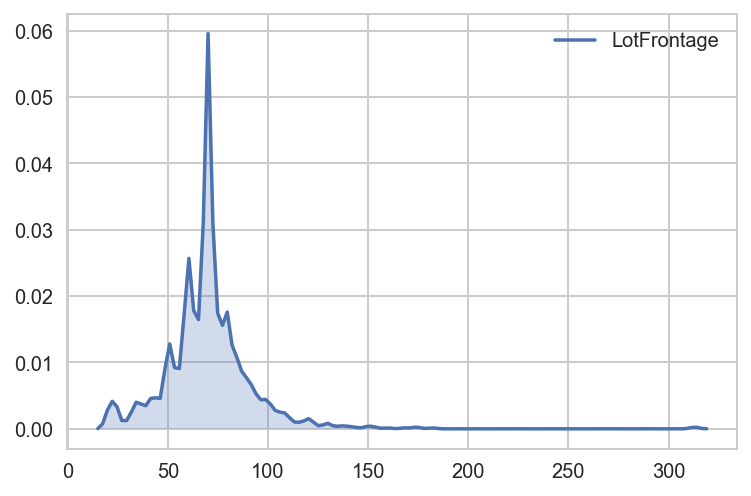

count    1450.000000
mean       70.043448
std        22.022359
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
      LotFrontage  SalePrice
934         313.0     242000
1298        313.0     160000
1127        182.0     259000
231         174.0     403000
197         174.0     235000
1107        168.0     274725
1182        160.0     745000
1337        153.0      52500
1211        152.0     164000
313         150.0     375000
909         149.0     174000
807         144.0     223500
171         141.0     215000
277         140.0     141000
1173        138.0     200500
446         137.0     190000
159         134.0     320000
1151        134.0     149900
966         130.0     160000
523         130.0     184750
429         130.0     175000
276         129.0     201000
1359        129.0     315000
889         128.0     149500
1273        124.0     177000
1361        124.0     260000
86          122

In [438]:
def group_cols_get_mean(col_name):
    hs = house[[col_name, 'SalePrice']]
    grp = hs['SalePrice'].groupby(hs[col_name])
    return grp.mean().sort_values(ascending = False)

# 1. Check neighbourhood and Subclass columns
print(group_cols_get_mean('Neighborhood'))
print(group_cols_get_mean('MSSubClass'))
print(group_cols_get_mean('Condition1'))
print(group_cols_get_mean('Condition2'))
# Infer: The means of various neighbourhoods are different. 
# Since the model approach is linear regression, the use of categorical variables might not be a suitable choice

# 2. Study the Lotfrontage subclass
# Check for null values
print('Null values in Sqft: ')
print(house.LotFrontage.isnull().sum())
hs = house[house['LotFrontage'].isnull()]
# Infer: There are about 259 values. The values seem like it has been missed. Considering the no of values,
# it seems better to impute using the median than deleting the values
house['LotFrontage'].fillna((house['LotFrontage'].median()), inplace=True)
print('Null values in Sqft after imputing with median: ')
print(house.LotFrontage.isnull().sum())

# Plot lot frontage and Sale price
print('LOT FRONTAGE PLOT')
sns.kdeplot(house.LotFrontage, shade = True, bw = 2)
plt.show()
print(house.LotFrontage.describe())
hs = house[['LotFrontage', 'SalePrice']]
print(hs.sort_values('LotFrontage', ascending = False))
# Infer - Houses with a lot frontage of 313 seem to be outliers. But not dropping these rows now as we havent checked all the columns
# This seems like a good predictor.
fixed.append('LotFrontage')


In [439]:
getmecolnames('Mat_')
# This is a set of characteristics that depends on the material used such as paint/roof material etc.
# Considering the fact that these are mostly changeable factors it is not considered as a fixed characteristic

['RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'GarageFinish',
 'WoodDeckSF',
 'Fence']

In [440]:
room_names = getmecolnames('Room_')
room_names
# Analyzing the below room numbers to find a possible predictor of Saleprice

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageCars']

In [441]:
remove = ['KitchenQual', 'GarageArea']
for r in remove:
    if r in room_names:
        room_names.remove(r)
print(room_names)
# Infer: These can be combined to form a single parameter called rooms, based on the following. 
# - Assumption: The sale price will depend on the no of rooms in a house.
# - Inference: No of rooms is a continuous variable
# After checking, I plan to use available parameter called 'Int_F_Room_TotRmsAbvGrd' as thats given

fixed.append('TotRmsAbvGrd')
fixed

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars']


['LotFrontage', 'TotRmsAbvGrd']

In [442]:
getmecolnames('Pool_')
# Pool area looks like a good continuous factor. Going ahead to analyze Int_F_Pool_Sqft_PoolArea

['PoolArea', 'PoolQC']

In [443]:
# Check for null values
print('Null values in Sqft: ')
print(house.PoolArea.isnull().sum())
# Infer: There are no null values in pool area
# Lets have a look at the pool area values
hs = house['PoolArea']
print(hs.value_counts())
# Infer: There are 1443 values that are zero. 
house[house['PoolArea'] != 0]
# From the given dataset, the pool quality is null for all 0 pool area value. 
# So it can be assumed that the 0 is not a outlier but indicates houses with no poo
fixed.append('PoolArea')

Null values in Sqft: 
0
0      1443
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


In [444]:
getmecolnames('Bsmnt_')

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF']

Null values in Sqft: 
0


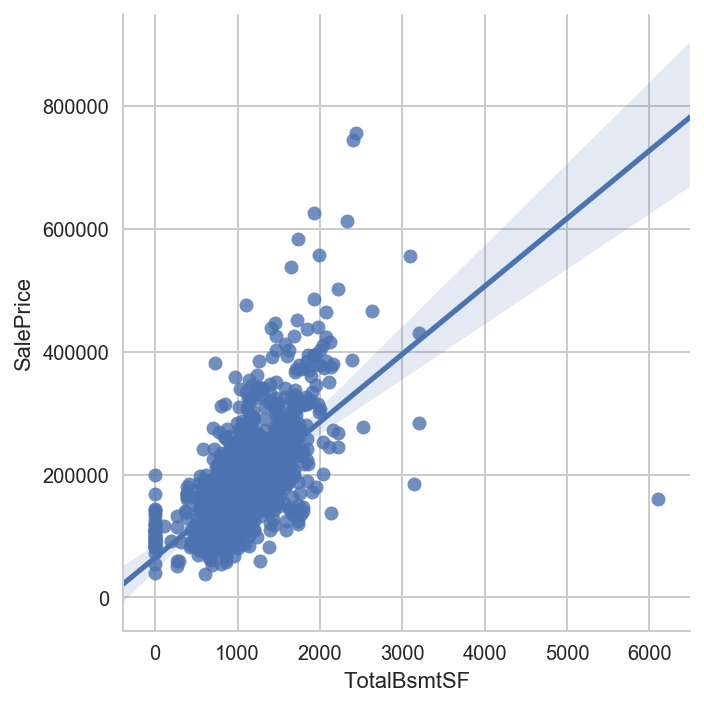

In [445]:
# Check for null values
print('Null values in Sqft: ')
print(house.TotalBsmtSF.isnull().sum())
# Infer: There are no null values in basement square feet

# Plot the variable Int_F_Bsmnt_Sqft_TotalBsmtSF and SalePrice to check any relation
sns.lmplot(x = "TotalBsmtSF", y = "SalePrice", data = house)
plt.show()
# Infer: Basement area looks like a good predictor.
fixed.append('TotalBsmtSF')

In [446]:
getmecolnames('Gar_')
# I would be interested in checking a relation between no of cars and garage square feet

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

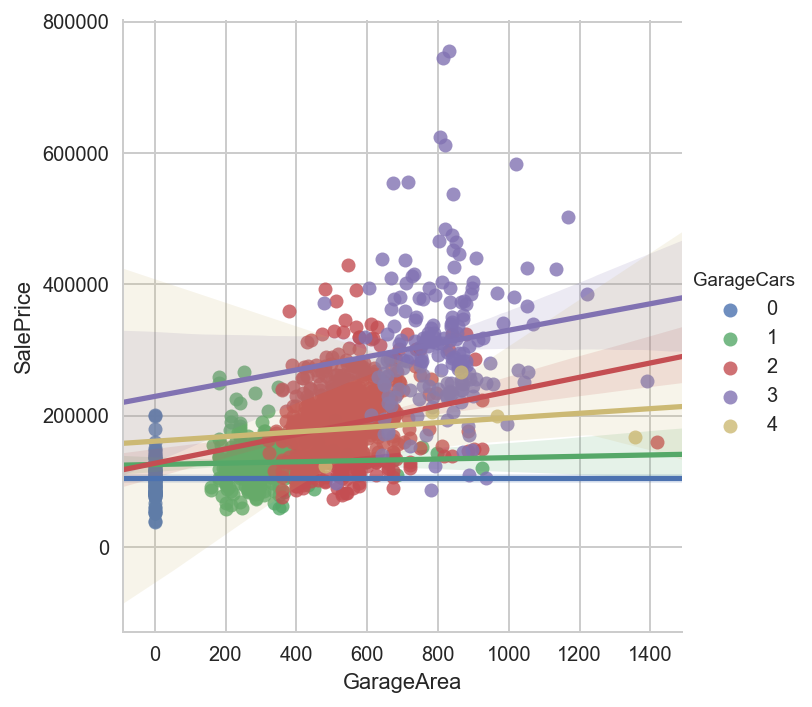

In [447]:
# Getting to know these values
sns.lmplot(y="SalePrice", x="GarageArea", data = house, hue = 'GarageCars')
house[['GarageArea', 'GarageCars']].describe()
#Infer: Since there is a non random relation betweme garage sale price and garage rooms, one of the parameters can be added to fixe
fixed.append('GarageArea')

In [448]:
getmecolnames('Sqft_')

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

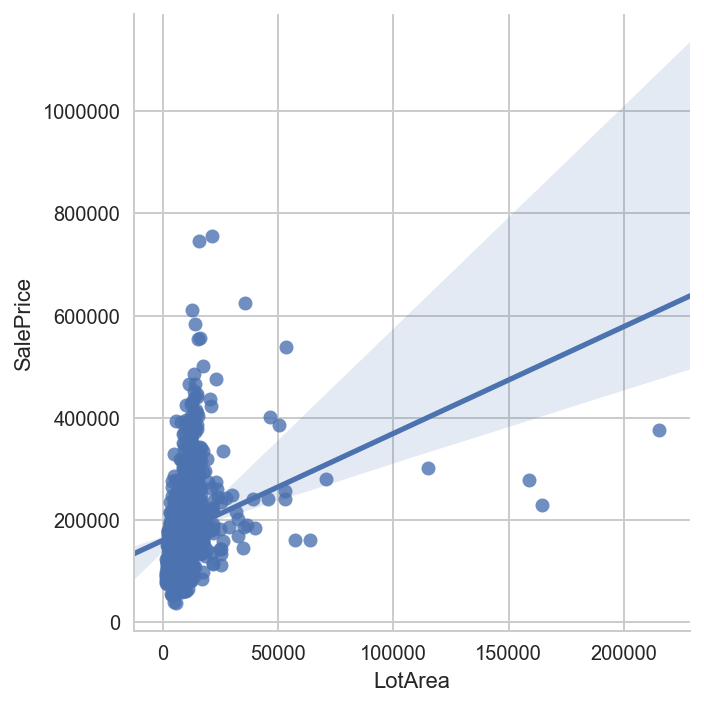

In [449]:
# Getting to know these values
sns.lmplot(y="SalePrice", x="LotArea", data = house)
house[['LotArea']].describe()
#Infer: Since there is a non random relation betweme garage sale price and garage rooms, one of the parameters can be added to fixe
fixed.append('LotArea')

In [450]:
getmecolnames('Year_')

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [451]:
# Credits to Mahindra. This is an amazing thought process.

# Age of the house while it sold
house['Age_while_Sale']=house['YrSold']-house['YearBuilt']
# Age of the house after rebuild
house['Rebuild_age_while_sale']=house['YrSold']-house['YearRemodAdd']
# currrent age of the house from first make . Assuming current year is 2010 from the data
house['age']= 2010-house['YearBuilt']
fixed.append('Age_while_Sale')

/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [452]:
# The following are the selected fixed charachteristics based on the EDA above
# ['LotFrontage',
#  'TotRmsAbvGrd',
#  'PoolArea',
#  'TotalBsmtSF',
#  'GarageArea',
#  'LotArea',
#  'Age_while_Sale']
fixed

['LotFrontage',
 'TotRmsAbvGrd',
 'PoolArea',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'Age_while_Sale']

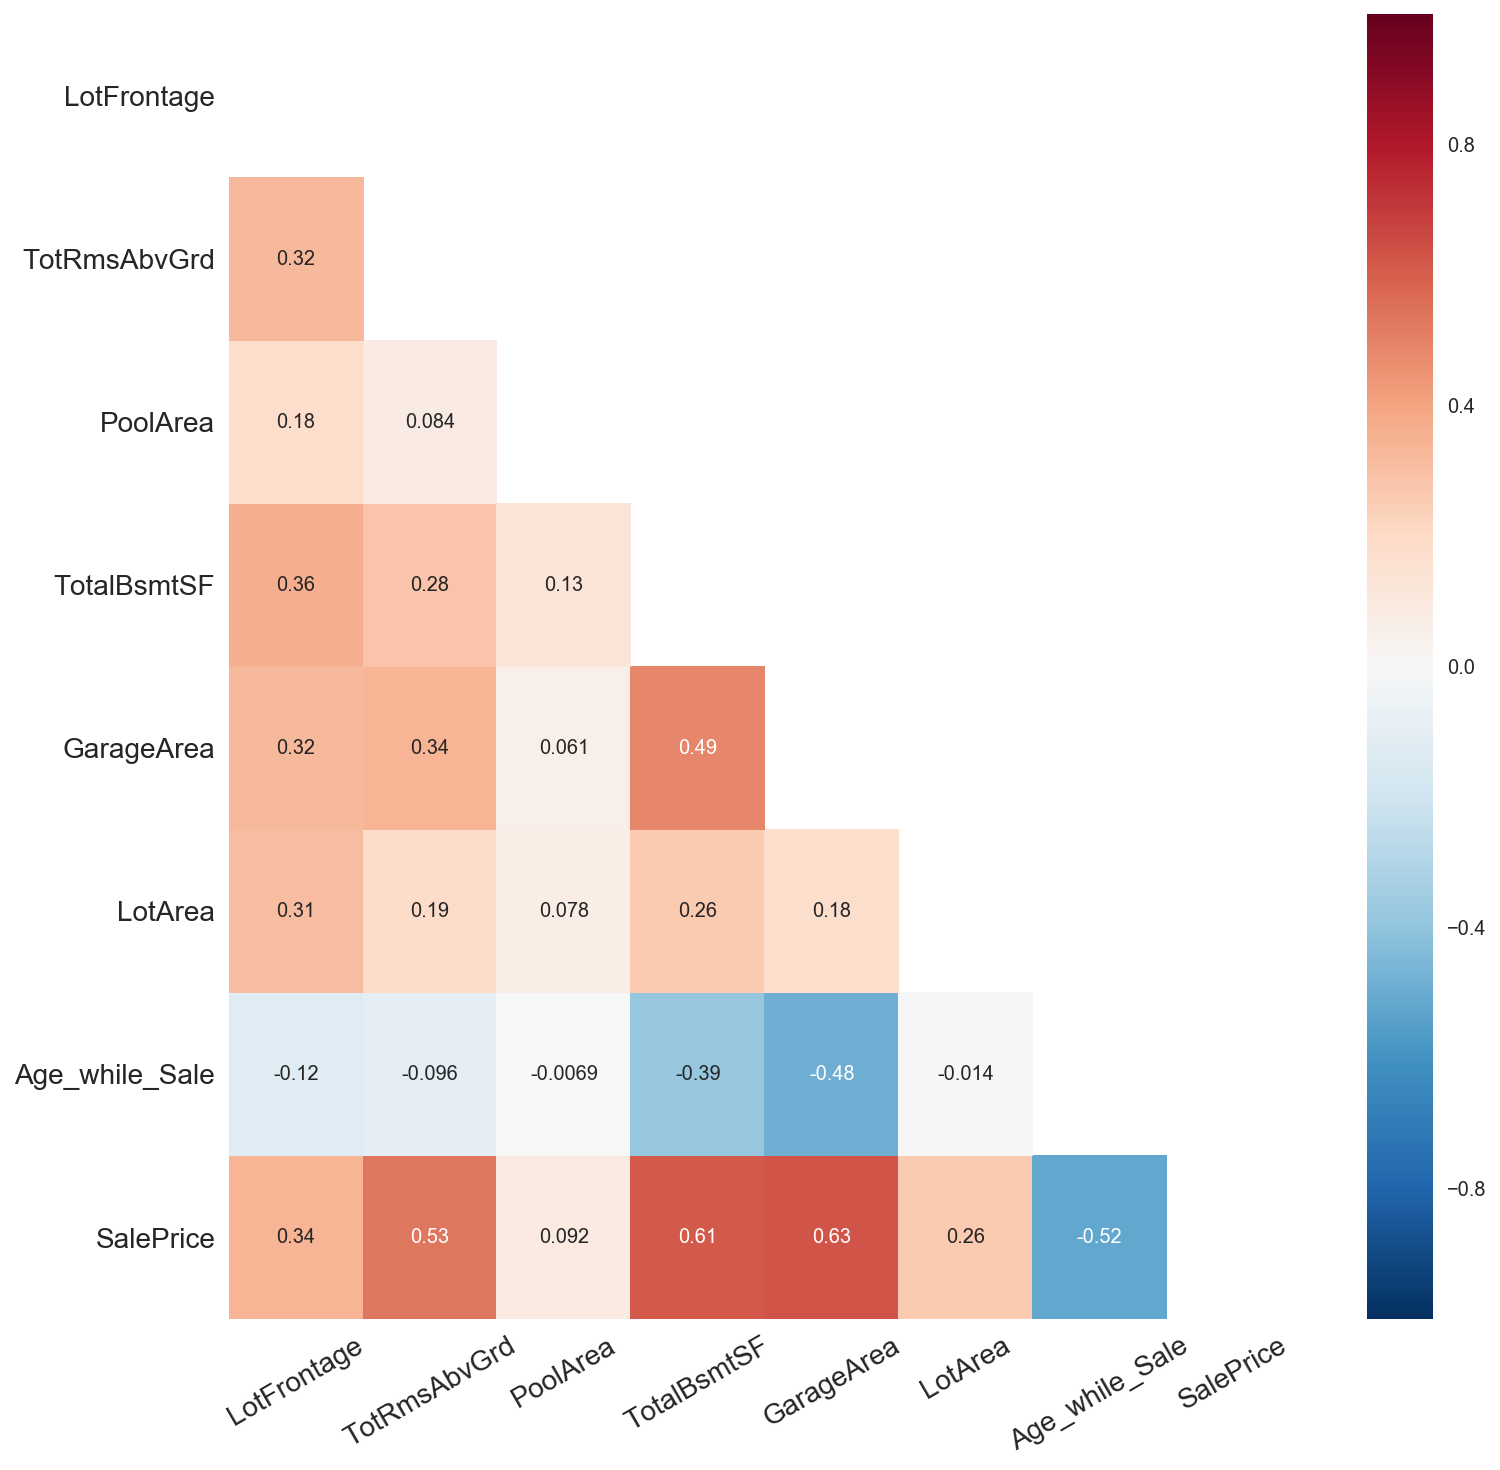

In [453]:
def correlation_heat_map(df):
    corrs = df.corr()
    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12, 12))
    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

heat_map_col = fixed
heat_map_col.append('SalePrice')
fixed_corr = house[heat_map_col]
correlation_heat_map(fixed_corr)

# Looking at the heat map below, Initial model will choose only 3 of the highly correlated columns ( > 0.05)
# ['TotRmsAbvGrd','TotalBsmtSF','GarageArea', 'Age_while_Sale']

In [454]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

R2 on Training set:  0.636311228475
R2 on Testing set:  0.737193436944


1224.3101371452472

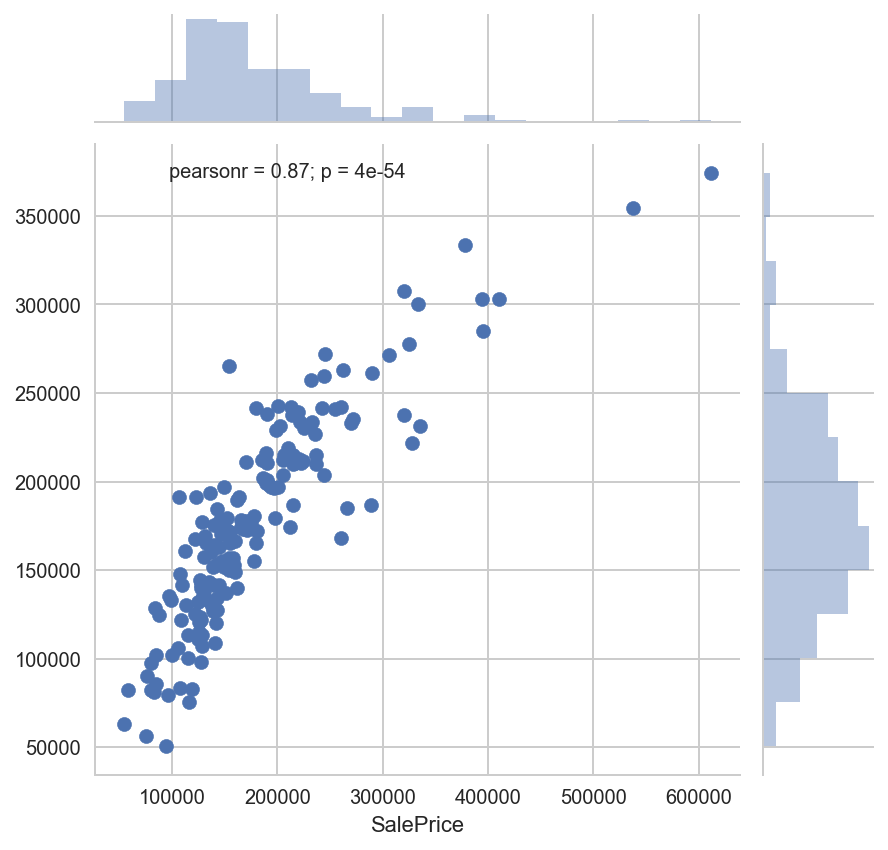

In [455]:
# Set your target and predictors
y = house.SalePrice.values
predictors =  ['TotRmsAbvGrd','TotalBsmtSF','GarageArea', 'Age_while_Sale']
X = house[predictors]
lr_model = LinearRegression()

# Training data on pre 2010 data
mask = house['YrSold'] < 2010
X_train = house[mask][predictors]
y_train = house[mask]['SalePrice']
# Testing data on data >= sale year 2010
mask = house['YrSold'] >= 2010
X_test = house[mask][predictors]
y_test = house[mask]['SalePrice']

# Fitting the model
lr_model.fit(X_train, y_train)
# Compare the model score obtained on training and testing set
print('R2 on Training set: ', lr_model.score(X_train, y_train))
print('R2 on Testing set: ', lr_model.score(X_test, y_test))

y_hat = lr_model.predict(X_test)
sns.jointplot(y_test, y_hat)
(y_test-y_hat).mean()

In [456]:
# Trying on K-fold cross validation model
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

Mean of Cross-validated scores with a K-fold of 10:
0.734661782425
Cross-Predicted R2 on training set: 0.738011178157


-115.84860700365344

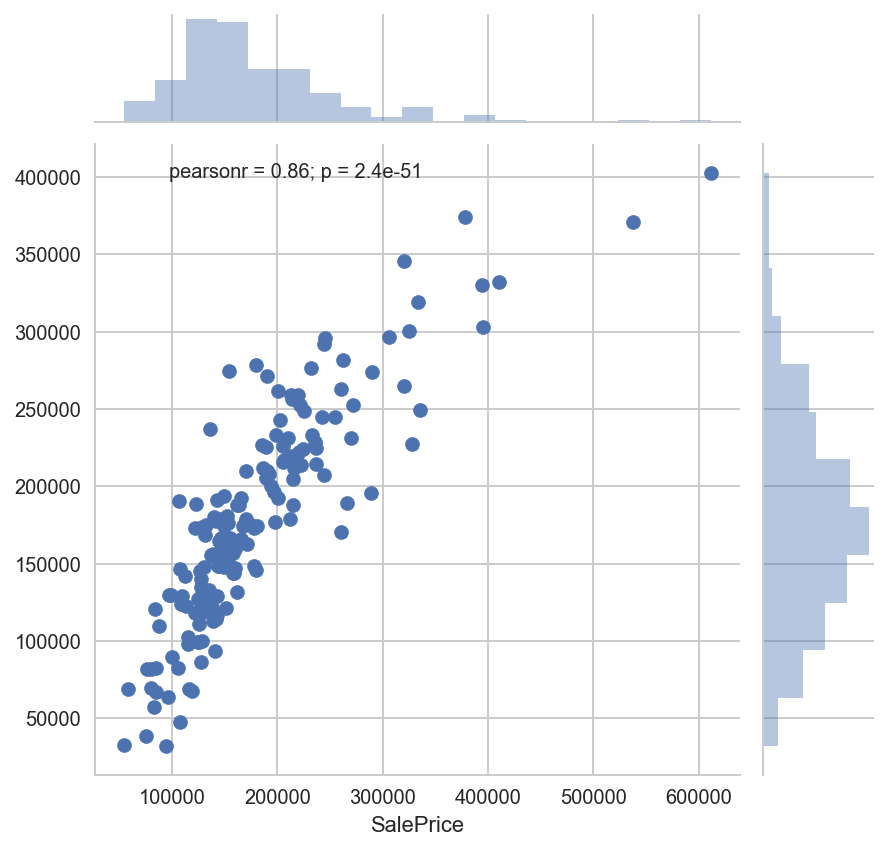

In [457]:
# Perform 10-fold cross validation
scores = cross_val_score(lr_model, X_test, y_test, cv=8)
print("Mean of Cross-validated scores with a K-fold of 10:")
print(scores.mean())

# Make cross validated predictions on the test sets
y_hat_cv = cross_val_predict(lr_model, X_test, y_test, cv=8)
sns.jointplot(y_test, y_hat_cv)
# plt.scatter(y, y_hat)
# manually calcualte the r2
r2 = metrics.r2_score(y_test, y_hat_cv)
print("Cross-Predicted R2 on training set:", r2)
(y_test-y_hat_cv).mean()

### PART 1 CONCLUSION:
Performed EDA and came up with 3 characteristics for predicting Sale price

EDA Approach: 
    - I examined the data initially and studied the shape, data types, sample data(head).
    - Since there were 81 columns, I found it easier to categorize them before proceeding with the EDA/Cleaning.
    - While understanding data description, I assigned prefixes to the column names that indicate what the column tries to convey.
    - My approach is such that a column can have more than one prefix based on the data it tries to convey. 
    - The main purpose being ease of filtering to study different groups of data, the increase in naming complexity seemed trivial. 
    - This helped me go through the kinds of columns and helped me select the features I felt were relevant based on my finding and assumptions. These have been stated in detail along with the code.
   
Result of EDA: 
    - Came up with predictors for modelling['TotRmsAbvGrd','TotalBsmtSF','GarageArea']
    - Tried Improvement on my model: Added a predictor ['Age_while_sale']
    
Modelling Approach:
    - Linear regression model was selected and the predictors and target from the EDA were used to build the model
    - The model was validated using Cross validation(10 fold) and Train/Test.
    - I tried different folds from 5 to 20 but there was not much of a variation.
    
Result of Modelling:
    - The R2 value is consistently ~0.59. I noticed that the score reduces if any of the parameter is removed.
    - Tried Improvement on my model: The R2 value is ~0.63 with addition of the Age_while_sale data, which is better than previous score.
        
        

In [458]:
# Select fixed predictors which are categorical
fixed_cat_cols = getme_mult_colnames('_Cat_', 'F_')
fixed_cat_df = house[fixed_cat_cols]
fixed_cont_cols = getme_mult_colnames('_Cont_', 'F_')
fixed_cont_df = house[fixed_cont_cols]

In [459]:
# Check for null values
def find_null_count_in_df(data):
    for col in data:
        null_count = data[col].isnull().sum()
        if null_count != 0:
            print(col, null_count)

In [460]:
find_null_count_in_df(fixed_cat_df)

BsmtFinType1 37
BsmtFinType2 38
GarageType 79
MiscFeature 1398


In [461]:
# Impute columns with null values
fixed_cat_df.ix[:,'BsmtFinType1'].fillna("NoBasement", inplace=True)
fixed_cat_df.ix[:,'BsmtFinType2'].fillna("NoBasement", inplace=True)
fixed_cat_df.ix[:,'GarageType'].fillna("NoGarage", inplace=True)
fixed_cat_df.ix[:,'MiscFeature'].fillna("NoFeature", inplace=True)
find_null_count_in_df(fixed_cat_df)

/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [462]:
find_null_count_in_df(fixed_cont_df)

GarageYrBlt 79


In [463]:
fixed_cont_df.ix[:,'GarageYrBlt'].fillna(fixed_cont_df['YearBuilt'], inplace=True)
find_null_count_in_df(fixed_cont_df)

/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [481]:
fixed_df = pd.concat([fixed_cont_df, fixed_cat_df], axis = 1)
print(fixed_df.columns)
print(len(fixed_df.columns))

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'MSSubClass', 'MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'WoodDeckSF', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
49


In [484]:
fixed_df_dummies = pd.get_dummies(fixed_df, drop_first = True)

In [489]:
fixed_df_dummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,WoodDeckSF,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_NoFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,548,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,460,0,0,0,0,0,0,5,2007,181500,298,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,608,42,0,0,0,0,0,9,2008,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,642,35,272,0,0,0,0,2,2006,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,836,84,0,0,0,0,0,12,2008,250000,192,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [488]:
# MS Subclass is a categorcial variable, but since it is represented in numbers, it was not dropped while getting dummies
# For now, I will drop that variable and come back to it to change numbers to names
fixed_df_dummies.drop('MSSubClass', axis = 1,inplace = True)

In [490]:
# I have my Dataframe for fixed variables.
# categorical - changed to dummies and null values imputed
# continuous - null values imputed
# It is called fixed_df_dummies

## START LASSO AND RIDGE

In [491]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

In [531]:
y = house.SalePrice.values
predictors = ['TotRmsAbvGrd','TotalBsmtSF','GarageArea']
X = fixed_df_dummies.ix[:, :]

In [532]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

In [533]:
ss = StandardScaler()
# Use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

In [534]:
# Perform linear regression
linreg = LinearRegression()
linreg_scores = cross_val_score(linreg, Xs, y, cv=10)
print(linreg_scores)
print(np.mean(linreg_scores))

[ 1.          1.          0.99999983  0.99999959  1.          1.
  0.99999999  1.          0.99999991  1.        ]
0.999999932568


In [535]:
# The score is toooo good. This is overfitting. Hence Ill go ahead and do regularization

In [536]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y)

print(optimal_ridge.alpha_)

1.0


## TRY LASSO

In [526]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

489.389483702


..............................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [527]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs, y, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.62540764  0.709453    0.70668118  0.62131586  0.60819564  0.68606863
  0.56331095  0.66814757  0.25310166  0.60216761]
0.604384974702


In [528]:
# Check out lassos coefficients

In [529]:
lasso.fit(Xs, y)

Lasso(alpha=489.38948370179008, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [530]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
2,27540.229617,27540.229617,GarageArea
1,27474.769523,27474.769523,TotalBsmtSF
0,24612.833018,24612.833018,TotRmsAbvGrd


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [467]:
# Deciding which changeable feature to include!
# I will be looking at renovatable features related to - Utilities, Quality, Condition and Materials used
# (i.e. columns with prefixes Util, Qual, Cond, Mat)

In [468]:
# Since Im not familiar with this type of problem, I will try to fit with one predictor against the residuals from Model 1
# Once familiarized I will select the right predictors

In [469]:
# Calculating the residual from the model
## Need to check if the residual from cross validation is to be used or from test/train method
residual = (y_test - y_hat)
print(residual)
residual_square = residual ** 2
print(residual_square)

16       -3004.822746
24        3816.053464
26       -8736.304896
27       34649.285165
33      -12601.897378
38      -12763.011421
45       82181.021668
52      -31377.980722
63      -24276.146026
66      -61409.906428
68       -2141.410852
73      -18251.882923
74      -40511.470485
78      -56832.385621
98        1482.944105
99       15479.630960
100       1497.238505
101      -2710.817116
103     -30209.708894
109     -47890.954922
111      14819.024956
118      12434.120462
140      14514.062735
142      -8571.889439
147      11847.261198
157      36152.075781
158      13989.179599
162     -19281.297335
171      28359.662993
200     -35401.115787
211     -16101.973326
214      21802.740710
228      -6897.837503
230      -7109.786436
233      -5950.528535
234       5853.214637
236     -26788.092117
237      -2464.758914
239     -17617.062803
240       -452.322343
244      -7106.403106
250     -13520.062050
254       3163.189967
263      -8410.253667
272      28465.854695
276     -4

In [470]:
getmecolnames('Qual_')

['ExterQual',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'PoolQC']

In [471]:
getmecolnames('Cond_')

['ExterCond', 'BsmtCond', 'Functional', 'GarageCond']

In [472]:
getmecolnames('Mat_')

['RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'GarageFinish',
 'WoodDeckSF',
 'Fence']

In [473]:
getmecolnames('Util_')

['Utilities',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'Fireplaces',
 'FireplaceQu']